In [14]:
import SimpleITK as sitk

In [15]:
#Examples of get methods on images

image = sitk.ReadImage("osfstorage-archive/dataset-verse19training/derivatives/sub-verse004/sub-verse004_seg-vert_snp.png")
image.GetSize()
image.GetWidth()
image.GetHeight()
image.GetNumberOfPixels()

image.GetOrigin()   #(0.0, 0.0)
image.GetSpacing()  #(1.0, 1.0)
image.GetDirection()    #(1.0, 0.0, 0.0, 1.0)
image.GetNumberOfComponentsPerPixel()   #4

image.GetDimension()            #2
image.GetDepth()                #0
image.GetPixelIDValue()         #13
image.GetPixelIDTypeAsString()  #vector of 8-bit unsigned integer


In [40]:
#list all the path of png files

import os

# Specify the path to the directory
directory_path = 'osfstorage-archive'

# Get the list of folders in the specified directory
folder_list = [folder for folder in os.listdir(directory_path) if os.path.isdir(os.path.join(directory_path, folder))]

png_list = []
# Print the list of folders
for folder in folder_list:
    sub_path = directory_path + '/' + folder + '/derivatives'
    sub_list = [sub for sub in os.listdir(sub_path)]
    for sub in sub_list:
        final_path = directory_path + '/' + folder + '/derivatives/' + sub
        png_list.extend([final_path + '/' + file for file in os.listdir(final_path) if file.endswith('.png')])


In [42]:
#creates all the images

images = []
for file in png_list:
    images.append(sitk.ReadImage(file))

In [84]:
#get useful info on images

sizes = [image.GetSize() for image in images]
widths = [image.GetWidth() for image in images]
heights = [image.GetHeight() for image in images]
npixels = [image.GetNumberOfPixels() for image in images]

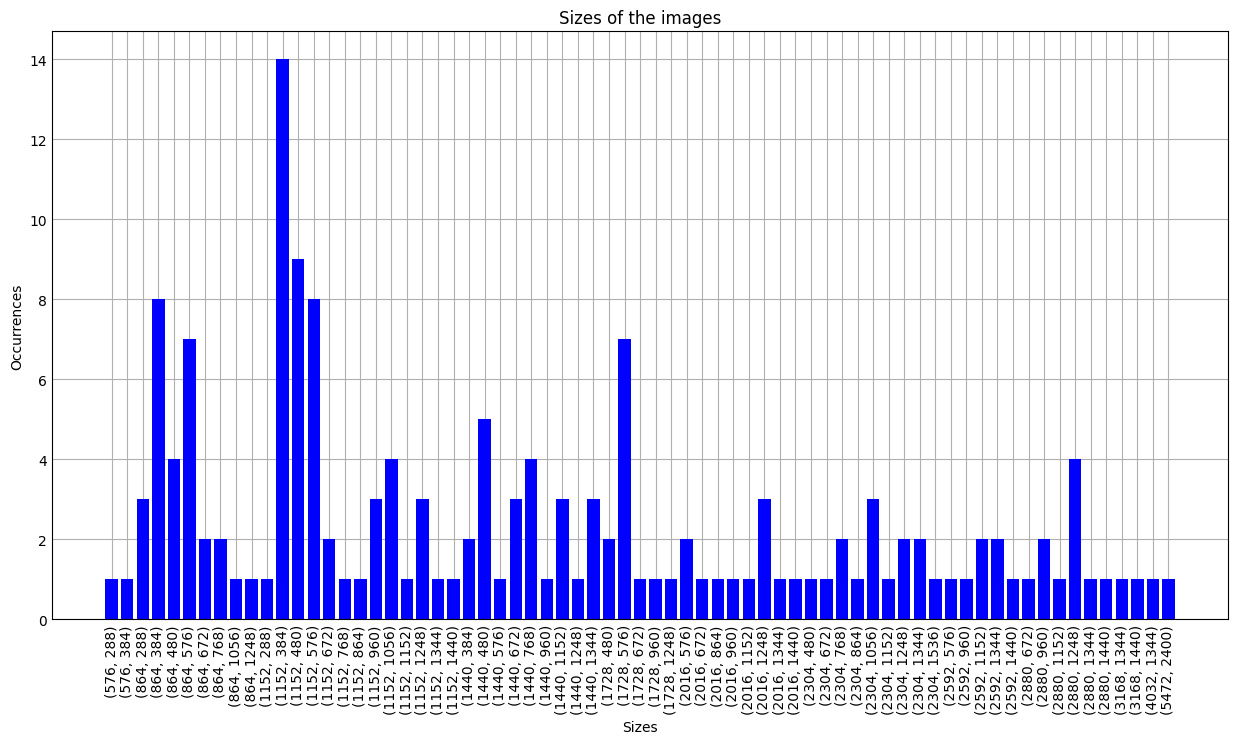

In [142]:
#graph those info

from collections import Counter
import matplotlib.pyplot as plt

# Use Counter to count occurrences
occurrences = Counter(sorted(sizes))

# Extract data for plotting
values = [f"{x}" for x in occurrences.keys()]
counts = list(occurrences.values())

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the bar chart
plt.bar(values, counts, color='blue')

# Rotate X-axis labels for better readability
plt.xticks(rotation=90, ha='center')

# Add labels and title
plt.xlabel('Sizes')
plt.ylabel('Occurrences')
plt.title('Sizes of the images')

# Show the plot
plt.show()


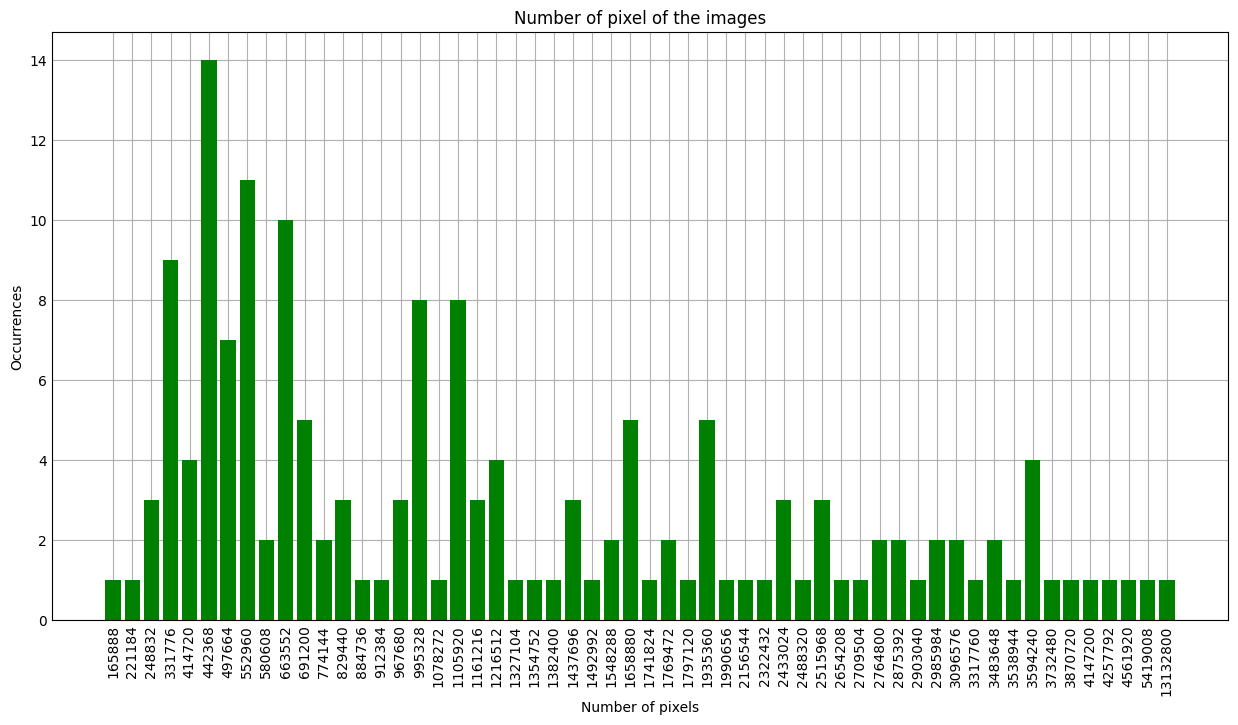

In [146]:
#graph those info

from collections import Counter
import matplotlib.pyplot as plt

# Use Counter to count occurrences
occurrences = Counter(sorted(npixels))

# Extract data for plotting
values = [f"{x}" for x in occurrences.keys()]
counts = list(occurrences.values())

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot the bar chart
plt.bar(values, counts, color='green')

# Rotate X-axis labels for better readability
plt.xticks(rotation=90, ha='center')

# Add labels and title
plt.xlabel('Number of pixels')
plt.ylabel('Occurrences')
plt.title('Number of pixel of the images')

# Show the plot
plt.show()
